In [441]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Cho ma trận sau:



M=1 1 0
  2 2 0
  3 3 0
  4 4 0
  5 5 0
  6 6 1
  7 7 1
  8 8 1
  9 9 1
  10 10 1

  

1. Viết câu lệnh để tách cột 1 và 2 lưu vào ma trận X, cột 3 lưu vào y.

In [442]:
M=np.array([[1,1,0],
            [2,2,0],
            [3,3,0],
            [4,4,0],
            [5,5,0],
            [6,6,1],
            [7,7,1],
            [8,8,1],
            [9,9,1],
            [10,10,1]])

X = M[:,:2]
y = M[:,-1]
X,y

(array([[ 1,  1],
        [ 2,  2],
        [ 3,  3],
        [ 4,  4],
        [ 5,  5],
        [ 6,  6],
        [ 7,  7],
        [ 8,  8],
        [ 9,  9],
        [10, 10]]),
 array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1]))

2. Viết hàm để tách X và y thành X_test, X_train, y_test, y_train theo một tỉ lệ cho trước. In dữ liệu để kiểm tra

In [443]:
def train_test_split(X,Y,percentage):
  n = int(len(X)* (percentage/100))
  tmp = np.random.choice(np.arange(0, len(X)), replace=False,size=(len(X)))
  x_train = [X[i] for i in tmp[:n]]
  y_train = [Y[i] for i in tmp[:n]]
  x_test = [X[i] for i in tmp[n:]]
  y_test = [Y[i] for i in tmp[n:]]
  x_train = np.array(x_train)
  x_test = np.array(x_test)
  y_train = np.array(y_train)
  y_test = np.array(y_test)
  return x_train,x_test,y_train,y_test

In [444]:
x_train, x_test, y_train, y_test = train_test_split(X,y,80)
print("X train: ",x_train)
print("y train: ",y_train)
print("X test: ",x_test)
print("y test: ",y_test)

X train:  [[ 4  4]
 [ 7  7]
 [ 5  5]
 [ 9  9]
 [ 8  8]
 [ 2  2]
 [ 6  6]
 [10 10]]
y train:  [0 1 0 1 1 0 1 1]
X test:  [[3 3]
 [1 1]]
y test:  [0 0]


3. Sử dụng thư viện có sẵn để tách bộ dữ liệu theo yêu cầu câu 2

In [445]:
from sklearn.model_selection import train_test_split as train_test_split2 

x_train, x_test, y_train, y_test = train_test_split2(X,y,test_size=2)
print("X train: ",x_train)
print("y train: ",y_train)
print("X test: ",x_test)
print("y test: ",y_test)

X train:  [[ 8  8]
 [ 6  6]
 [ 7  7]
 [ 9  9]
 [ 1  1]
 [10 10]
 [ 3  3]
 [ 5  5]]
y train:  [1 1 1 1 0 1 0 0]
X test:  [[4 4]
 [2 2]]
y test:  [0 0]


4. Viết câu lệnh để đọc file Data_classification.csv cho trước lưu vào Dataset

In [446]:
data = pd.read_csv("data_classification.csv").values
data[:10]

array([[8.62543976, 0.05892653, 0.        ],
       [3.82819154, 0.72319923, 0.        ],
       [7.15095484, 3.89942042, 1.        ],
       [6.47790044, 8.19818055, 1.        ],
       [1.9222695 , 1.33142726, 0.        ],
       [8.97821589, 0.99343751, 1.        ],
       [6.63560308, 8.54280268, 1.        ],
       [7.67235895, 5.41639979, 1.        ],
       [4.86601533, 2.04267129, 0.        ],
       [6.86140497, 9.65530972, 1.        ]])

5. Vẽ các điểm dữ liệu ra màn hình, điểm có nhãn 0 vẽ màu đỏ, nhãn 1 vẽ màu xanh

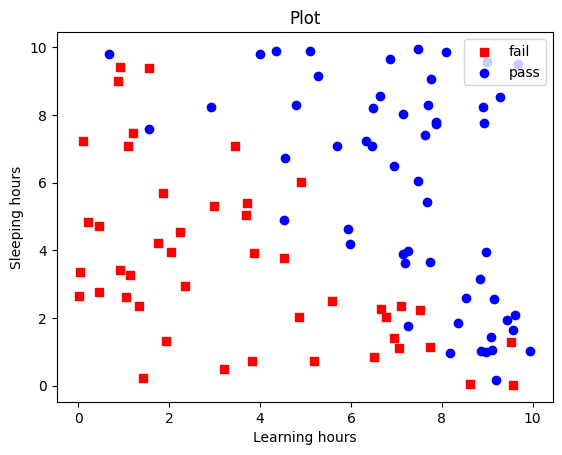

In [447]:
red = data[data[:,-1] == 0]
blue = data[data[:,-1] == 1]
plt.figure()
plt.scatter(red[:,0],red[:,1],c='r',marker='s',label ='fail')
plt.scatter(blue[:,0],blue[:,1],c='b',marker='o',label ="pass")
plt.xlabel("Learning hours")
plt.ylabel("Sleeping hours")
plt.title("Plot")
plt.legend(loc=1)
plt.show()

6. Tách tập dữ liệu Dataset ở câu 4 thành X và y

In [448]:
dong, cot = data.shape
print(dong,cot)
X = data[:,:(cot-1)]
y = data[:,-1]
print(X[:10])
print(y[:10])

99 3
[[8.62543976 0.05892653]
 [3.82819154 0.72319923]
 [7.15095484 3.89942042]
 [6.47790044 8.19818055]
 [1.9222695  1.33142726]
 [8.97821589 0.99343751]
 [6.63560308 8.54280268]
 [7.67235895 5.41639979]
 [4.86601533 2.04267129]
 [6.86140497 9.65530972]]
[0. 0. 1. 1. 0. 1. 1. 1. 0. 1.]


7. Bổ sung cột số 1 vào trước X

In [449]:
z = np.ones((X.shape[0],1))
X = np.concatenate((z,X),axis=1)
X[:10]

array([[1.        , 8.62543976, 0.05892653],
       [1.        , 3.82819154, 0.72319923],
       [1.        , 7.15095484, 3.89942042],
       [1.        , 6.47790044, 8.19818055],
       [1.        , 1.9222695 , 1.33142726],
       [1.        , 8.97821589, 0.99343751],
       [1.        , 6.63560308, 8.54280268],
       [1.        , 7.67235895, 5.41639979],
       [1.        , 4.86601533, 2.04267129],
       [1.        , 6.86140497, 9.65530972]])

8. Tách X,y thành X_train, X_test, y_train, y_test. Dùng hàm tự viết và dùng thư viện có sẵn. In kết quả kiểm tra

In [450]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split2(X,y,test_size=50)
print("X train: ",x_train)
print("y train: ",y_train)
print("X test: ",x_test)
print("y test: ",y_test)

X train:  [[1.         1.04321284 2.60976512]
 [1.         4.90308762 6.02547778]
 [1.         6.94443908 6.48470389]
 [1.         1.54596913 7.56770009]
 [1.         0.90407766 9.42092878]
 [1.         3.71788065 5.38166211]
 [1.         0.92562818 3.42126711]
 [1.         3.44310934 7.06634686]
 [1.         3.68499747 5.04996512]
 [1.         2.34361853 2.95870685]
 [1.         2.23818348 4.5348437 ]
 [1.         6.33309623 7.24030498]
 [1.         9.43820269 1.94381244]
 [1.         7.69192306 8.29822782]
 [1.         9.55717884 1.64467191]
 [1.         0.66547833 9.78263644]
 [1.         7.15470123 8.0147902 ]
 [1.         8.34775105 1.86081251]
 [1.         1.75344854 4.2192426 ]
 [1.         7.25343893 1.76251062]
 [1.         0.86040708 8.98818814]
 [1.         8.97821589 0.99343751]
 [1.         5.09102909 9.87313409]
 [1.         9.00037648 9.54932786]
 [1.         4.35755102 9.88798331]
 [1.         5.9409696  4.62063163]
 [1.         0.45567818 4.72229748]
 [1.         5.185

9. Viết hàm tính Sigmod

In [451]:
import math
def sigmoid(z):
    rs = 1 / (1 + np.exp(-z))
    return rs

10. Viết hàm tính hàm mất mát theo mô hình mồi quy logistic

In [452]:
# def cost_function(x_train,y_train,w):
#     n = len(x_train)  
#     a = np.dot(x_train,w.T)
#     rs = np.dot(y_train,np.log(sigmoid(a)).T) + np.dot((1 - y_train),np.log(1 - sigmoid(a)))
#     rs = -rs/n 
#     return rs
def cost_function(x, y, w):
    n = len(x)
    a = np.dot(x, w)
    rs = np.dot(y, np.log(sigmoid(a))) + np.dot((1 - y), np.log(1 - sigmoid(a)))
    rs = -rs / n
    return rs

In [453]:
# np.dot(xxx,x_train[2].T)

11. Viết hàm huấn luyện mô mình.

In [454]:
# def train_model(x_train,y_train,w,epochs=1000,learning_rate=0.1):
#     hist = []
#     n = len(x_test)
#     for i in range(epochs):
#         w -= learning_rate*np.dot(x_train.T,(sigmoid(np.dot(x_train,w)) - y_train))
#         hist.append(cost_function(x_train,y_train,w))
#     return w, hist
def train_model(x, y, w, epochs=1000, learning_rate=0.1):
    history = []

    for i in range(epochs):
        gradient = np.dot(x.T, (sigmoid(np.dot(x, w)) - y)) / len(x)
        w -= learning_rate * gradient
        cost = cost_function(x, y, w)
        history.append(cost)

    return w, history

12. In tham số mô hình để kiểm tra.

In [455]:
w = np.random.randn((x_train.shape[1]))
w, hist = train_model(x_train,y_train,w)

In [456]:
print(w)

[-4.56509184  0.57606515  0.40814292]


13. Vẽ biểu đồ biểu thị sự giảm của hàm mất mát

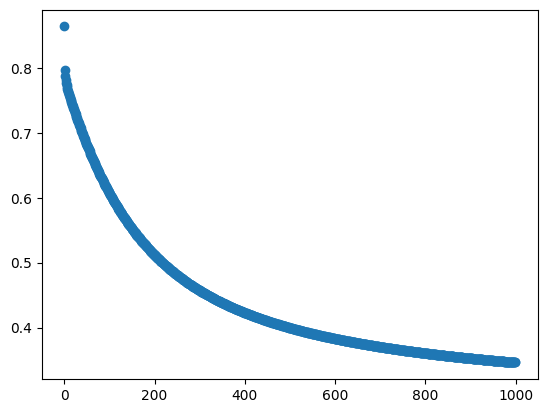

In [457]:
plt.figure()
plt.scatter(x=range(len(hist)),y=hist)
plt.show()

14. Viết hàm dự đoán.

In [458]:
def predict(w,x_test,y_test,theta):
    pre_pred = sigmoid(np.dot(x_test,w.T))
    pred = np.where(pre_pred>=theta,1,0)
    count = 0
    for i in range(len(pred)):
        if pred[i] == y_test[i]:
            count += 1

    return (count/len(y_test) * 100)

15. Viết hàm chuyển đổi kết quả dự đoán về 0 và 1

In [459]:
result = predict(w,x_test,y_test,theta=0.5)

16. Cho biết tỉ lệ dự đoán từ mô hình do bạn xây dựng nên

In [460]:
print(result)

86.0


17. Sử dụng mô hình có từ các thư viện để dự đoán so sánh kết quả.

```
# Định dạng của đoạn này là mã
```



In [461]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [462]:
# Tạo mô hình Logistic Regression
model = LogisticRegression()

# Huấn luyện mô hình trên tập huấn luyện
model.fit(x_train, y_train)


LogisticRegression()

In [463]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(x_test)
# Tham so mo hinh
print("Tham so: ",model.coef_)
# Đánh giá hiệu suất
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

# In báo cáo phân loại
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)


Tham so:  [[-7.92816384e-08  1.04167556e+00  8.28589088e-01]]
Accuracy: 92.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.82      0.90        22
         1.0       0.88      1.00      0.93        28

    accuracy                           0.92        50
   macro avg       0.94      0.91      0.92        50
weighted avg       0.93      0.92      0.92        50



18. Thay đổi giá trị learning_rate so sánh tỉ lệ dự đoán

In [464]:
w, hist = train_model(x_train,y_train,w,learning_rate=0.001)
print(w)
predict(w=w,x_test=x_test,y_test=y_test,theta=0.5)

[-4.58905865  0.57852672  0.41033248]


86.0

19. In ra ma trận Confution matrix để xem số lượng điểm dự đoán đúng cho từng lớp

In [465]:
def confution_matrix(x_test,y_test):
    pre_pred = sigmoid(np.dot(x_test,w.T))
    pred = np.where(pre_pred>=0.5,1,0)
    t1,t2,t3,t4 = 0,0,0,0
    for i in range(len(pred)):
        if pred[i] == y_test[i] and pred[i] == 1:
            t1 += 1
        if pred[i] == y_test[i] and pred[i] == 0:
            t2 += 1
        if pred[i] != y_test[i] and pred[i] == 0:
            t3 += 1
        if pred[i] != y_test[i] and pred[i] == 1:
            t4 += 1
            
    return t1,t2,t3,t4

In [466]:
t1,t2,t3,t4 = confution_matrix(x_test=x_test,y_test=y_test)
print(t1,"|",t4)
print(t3,"|",t2)

28 | 7
0 | 15


20. Sử dụng mô hình trên cho bài toán dự đoán nhị phân bất kỳ như dự đoán bệnh ung thư, bệnh trầm cảm, khách hàng gởi tiền vào ngân hàng. SV tự tìm dữ liệu trên mạng